In [1]:
import sys, os
import numpy as np
import scipy.spatial.distance

import pandas as pd

import PIL.Image

import matplotlib.pyplot as plt

project_root = '/user_data/mmhender/featsynth/'
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities
# from image_analysis_morecode import extract_resnet_features

In [3]:
# import proc_ecoset_categs
# proc_ecoset_categs.get_ecoset_files_good()

In [3]:
# info about ecoset categories
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())

In [13]:
info['sinfo']['musical instrument']['basic_names']

array(['bell', 'guitar', 'piano', 'drum', 'violin', 'trumpet', 'clarinet',
       'cymbal'], dtype=object)

In [10]:
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset_OLDVERSION.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())
info['sinfo']['musical instrument']['basic_names']

array(['bell', 'guitar', 'piano', 'drum', 'violin', 'mandolin',
       'clarinet', 'ukulele'], dtype=object)

In [ ]:
np.random.seed(234345+66) 
ims_use = np.random.choice(ims_use_all, n_ex_each, replace=False)

In [4]:
import choose_extra_ecoset_ims

choose_extra_ecoset_ims.choose_best_ecoset_ims()

/user_data/mmhender/featsynth/features/clip/images_things64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_things64_list.csv
/user_data/mmhender/featsynth/features/clip/images_ecoset64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_ecoset64_list.csv
beetle: detected 1 duplicates with things, skipping these
beetle: detected 1 duplicates within ecoset, skipping these
bee: detected 1 duplicates within ecoset, skipping these
butterfly: detected 2 duplicates within ecoset, skipping these
butterfly: detected 2 bad images, skipping these
grasshopper: detected 1 duplicates with things, skipping these
ant: detected 1 bad images, skipping these
moth: detected 1 duplicates with things, skipping these
moth: detected 2 bad images, skipping these
mosquito: detected 3 duplicates within ecoset, skipping these
mosquito: detected 12 bad images, skipping these
pea: detected 3 bad images, skipping these
corn: detected 1 duplicates within ecoset, skipping these
pumpkin: 

In [5]:
fn1 = '/user_data/mmhender/featsynth/features/raw/images_comb64_list.csv'
fn2 = '/user_data/mmhender/featsynth/features/raw/images_comb64_music1_list.csv'

l1 = pd.read_csv(fn1)
l2 = pd.read_csv(fn2)

In [6]:
np.unique(np.array(l1['basic_name'])[l1['super_name']=='musical instrument'])

array(['bell', 'clarinet', 'cymbal', 'drum', 'guitar', 'piano', 'trumpet',
       'violin'], dtype=object)

In [7]:
np.unique(np.array(l2['basic_name'])[l2['super_name']=='musical instrument'])

array(['bell', 'clarinet', 'drum', 'guitar', 'mandolin', 'piano',
       'ukulele', 'violin'], dtype=object)

In [8]:
np.sum(l1==l2)

Unnamed: 0         3597
super_name         3904
super_index        3904
basic_name         3782
basic_index        3904
image_type         3904
exemplar_number    3597
image_filename     3565
orig_set           3904
dtype: int64

In [6]:
np.sum(l1==l2)

Unnamed: 0         1197
super_name         3904
super_index        3904
basic_name         3782
basic_index        3904
image_type         3904
exemplar_number    1197
image_filename     1173
orig_set           3904
dtype: int64

In [11]:
snames = list(info['sinfo'].keys())

for sname in snames:

    print(sname)
    inds = np.array(l1['super_name']==sname)
    
    print(np.sum(l1.iloc[inds]==l2.iloc[inds]))

insect
Unnamed: 0         470
super_name         488
super_index        488
basic_name         488
basic_index        488
image_type         488
exemplar_number    470
image_filename     470
orig_set           488
dtype: int64
vegetable
Unnamed: 0         477
super_name         488
super_index        488
basic_name         488
basic_index        488
image_type         488
exemplar_number    477
image_filename     477
orig_set           488
dtype: int64
fruit
Unnamed: 0         480
super_name         488
super_index        488
basic_name         488
basic_index        488
image_type         488
exemplar_number    480
image_filename     480
orig_set           488
dtype: int64
dessert
Unnamed: 0         482
super_name         488
super_index        488
basic_name         488
basic_index        488
image_type         488
exemplar_number    482
image_filename     482
orig_set           488
dtype: int64
tool
Unnamed: 0         480
super_name         488
super_index        488
basic_name     

In [7]:
bname = 'trumpet'

print('\n%s\n'%bname)

inds = np.where(np.array(l1['basic_name']==bname))[0]
inds = inds[0:40]

print(np.sum(l1.iloc[inds]==l2.iloc[inds]))

fns1 = np.array(l1['image_filename'])[inds]
fns2 = np.array(l2['image_filename'])[inds]

ex1 = np.array(l1['exemplar_number'])[inds]
ex2 = np.array(l2['exemplar_number'])[inds]

mismatch = np.where(fns1!=fns2)[0]

print('found %d mismatches\n'%len(mismatch))

print(np.all(np.unique(ex1[mismatch])==np.unique(ex2[mismatch])))

assert(np.all(np.unique(fns1)==np.unique(fns2)))


trumpet

Unnamed: 0         12
super_name         40
super_index        40
basic_name          0
basic_index        40
image_type         40
exemplar_number    12
image_filename      0
orig_set           40
dtype: int64
found 40 mismatches



ValueError: operands could not be broadcast together with shapes (39,) (40,) 

In [12]:
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())
snames = list(info['sinfo'].keys())

In [13]:
for bname in bnames:
# bname = 'bee'
    
    print('\n%s\n'%bname)
    
    inds = np.where(np.array(l1['basic_name']==bname))[0]
    inds = inds[0:40]
    
    print(np.sum(l1.iloc[inds]==l2.iloc[inds]))
    
    fns1 = np.array(l1['image_filename'])[inds]
    fns2 = np.array(l2['image_filename'])[inds]
    
    ex1 = np.array(l1['exemplar_number'])[inds]
    ex2 = np.array(l2['exemplar_number'])[inds]
    
    mismatch = np.where(fns1!=fns2)[0]
    
    print('found %d mismatches\n'%len(mismatch))
    
    print(np.all(np.unique(ex1[mismatch])==np.unique(ex2[mismatch])))
    
    assert(np.all(np.unique(fns1)==np.unique(fns2)))


beetle

Unnamed: 0         38
super_name         40
super_index        40
basic_name         40
basic_index        40
image_type         40
exemplar_number    38
image_filename     38
orig_set           40
dtype: int64
found 2 mismatches

True

bee

Unnamed: 0         38
super_name         40
super_index        40
basic_name         40
basic_index        40
image_type         40
exemplar_number    38
image_filename     38
orig_set           40
dtype: int64
found 2 mismatches

True

butterfly

Unnamed: 0         40
super_name         40
super_index        40
basic_name         40
basic_index        40
image_type         40
exemplar_number    40
image_filename     40
orig_set           40
dtype: int64
found 0 mismatches

True

grasshopper

Unnamed: 0         38
super_name         40
super_index        40
basic_name         40
basic_index        40
image_type         40
exemplar_number    38
image_filename     38
orig_set           40
dtype: int64
found 2 mismatches

True

caterpillar

U

AssertionError: 

In [57]:
inds

array([ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121])

In [40]:
ex1[mismatch], ex2[mismatch]

(array([160, 412,  85, 190, 218, 457,  89, 158]),
 array([412, 160, 190,  85, 457, 218, 158,  89]))

In [41]:
mismatch

(array([30, 31, 45, 46, 50, 51, 55, 56]),)

In [22]:
fns1[mismatch], fns2[mismatch]

(array(['/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02167151_9807.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02164464_17403.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02179192_2260.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02167151_10529.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02167151_8763.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02164464_10867.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02165105_2447.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/1346_beetle/n02174659_32696.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/0841_bee/n02207345_4917.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/0841_bee/n02206856_3796.JPEG',
        '/lab_data/tarrlab/common/datasets/Ecoset/train/0822_grasshopper/n02226429_13140.JPEG',
      

In [30]:
image_set_name1 = 'images_things64'
image_set_name2 = 'images_ecoset64'

# load clip embeddings for things and ecoset
feat_file_name1 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name1))
# feat_file_name1 = os.path.join(feat_path,'%s_bilinear_clip_embed.npy'%(image_set_name1))
print(feat_file_name1)
e_things = np.load(feat_file_name1)
# load corresponding labels
image_list_filename1 = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name1))
print(image_list_filename1)
labels_things = pd.read_csv(image_list_filename1, index_col=0)
labels_things['orig_set']='things'

feat_file_name2 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name2))
print(feat_file_name2)
e_ecoset = np.load(feat_file_name2)
image_list_filename2 = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name2))
print(image_list_filename2)
labels_ecoset = pd.read_csv(image_list_filename2, index_col=0)
labels_ecoset['orig_set']='ecoset'

/user_data/mmhender/featsynth/features/clip/images_things64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_things64_list.csv
/user_data/mmhender/featsynth/features/clip/images_ecoset64_clip_embed.npy
/user_data/mmhender/featsynth/features/raw/images_ecoset64_list.csv


In [35]:
bname = 'beetle'

# print(bname)
inds_things = np.where(labels_things['basic_name']==bname)[0]

inds_ecoset = np.where(labels_ecoset['basic_name']==bname)[0]


# cosine distances from each things image to each ecoset image
dist_each = scipy.spatial.distance.cdist(e_things[inds_things,:], \
                                         e_ecoset[inds_ecoset,:], metric='cosine')


In [36]:
dist_each = np.mean(dist_each, axis=0)

dist_each[ex1[mismatch]]

array([0.17826457, 0.17826753, 0.18331402, 0.18335788, 0.18512819,
       0.18513271, 0.18691146, 0.18693824, 0.24100289, 0.22582717,
       0.27334886, 0.23084704, 0.20108294, 0.18331402, 0.29251318,
       0.23379766, 0.33361225, 0.26655933])

In [37]:
dist_each[ex2[mismatch]]

array([0.17826753, 0.17826457, 0.18335788, 0.18331402, 0.18513271,
       0.18512819, 0.18693824, 0.18691146, 0.22582717, 0.24100289,
       0.23084704, 0.27334886, 0.18331402, 0.20108294, 0.23379766,
       0.29251318, 0.26655933, 0.33361225])

In [28]:
feat_path = os.path.join(project_root, 'features', 'clip')

image_set_name1 = 'images_things64'
image_set_name2 = 'images_things64_music1'

feat_file_name1 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name1))
print(feat_file_name1)
things_embed1 = np.load(feat_file_name1)

feat_file_name2 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name2))
print(feat_file_name2)
things_embed2 = np.load(feat_file_name2)

feat_file_name3 = os.path.join(feat_path,'%s_bilinear_clip_embed.npy'%(image_set_name1))
print(feat_file_name3)
things_embed3 = np.load(feat_file_name3)

feat_file_name4 = os.path.join(feat_path,'%s_clip_embed_TEST.npy'%(image_set_name1))
print(feat_file_name4)
things_embed4 = np.load(feat_file_name4)



/user_data/mmhender/featsynth/features/clip/images_things64_clip_embed.npy
/user_data/mmhender/featsynth/features/clip/images_things64_music1_clip_embed.npy
/user_data/mmhender/featsynth/features/clip/images_things64_bilinear_clip_embed.npy
/user_data/mmhender/featsynth/features/clip/images_things64_clip_embed_TEST.npy


In [25]:
things_embed1==things_embed2

array([[False,  True, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [26]:
np.max(np.abs(things_embed1[0,:]-things_embed2[0,:]))

0.002319336

In [6]:
things_embed2==things_embed3

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
things_embed1==things_embed3

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
things_embed2==things_embed3

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
things_embed1==things_embed4

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [9]:
np.max(np.abs(things_embed2[0,:]-things_embed3[0,:]))

0.041381836

In [10]:
image_list_filename1 = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name1))
print(image_list_filename1)
labels_things1 = pd.read_csv(image_list_filename1, index_col=0)
image_list_filename2 = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name2))
print(image_list_filename2)
labels_things2 = pd.read_csv(image_list_filename2, index_col=0)

/user_data/mmhender/featsynth/features/raw/images_things64_list.csv
/user_data/mmhender/featsynth/features/raw/images_things64_music1_list.csv


In [11]:
labels_things1.iloc[0]['image_filename']

'/user_data/mmhender/stimuli/things/Images/beetle/beetle_01b.jpg'

In [12]:
labels_things2.iloc[0]['image_filename']

'/user_data/mmhender/stimuli/things/Images/beetle/beetle_01b.jpg'

In [39]:
feat_path = os.path.join(project_root, 'features', 'clip')

image_set_name1 = 'images_ecoset64'
image_set_name2 = 'images_ecoset64_music1'

feat_file_name1 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name1))
print(feat_file_name1)
eco_embed1 = np.load(feat_file_name1)

feat_file_name2 = os.path.join(feat_path,'%s_clip_embed.npy'%(image_set_name2))
print(feat_file_name2)
eco_embed2 = np.load(feat_file_name2)



/user_data/mmhender/featsynth/features/clip/images_ecoset64_clip_embed.npy
/user_data/mmhender/featsynth/features/clip/images_ecoset64_music1_clip_embed.npy


In [40]:
eco_embed1==eco_embed2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
things_stim_path = '/user_data/mmhender/stimuli/things/'
ecoset_path = '/lab_data/tarrlab/common/datasets/Ecoset/'
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

ecoset_folder_names = os.listdir(os.path.join(ecoset_path, 'train'))
ecoset_names = [e.split('_')[1] for e in ecoset_folder_names]


In [ ]:
ind = np.where(np.array(ecoset_names)=='bugle')[0][0]
ecoset_names[ind] = 'trumpet'

ind = np.where(np.array(ecoset_names)=='cymbals')[0][0]
ecoset_names[ind] = 'cymbal'

In [22]:
np.where(np.array(ecoset_names)=='trumpet')

(array([468]),)

In [24]:
np.where(np.array(ecoset_names)=='cymbal')

(array([196]),)

In [3]:
# info about ecoset categories
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())


fn = '/user_data/mmhender/featsynth/features/raw/images_comb64_list.csv'

labels_all = pd.read_csv(fn)


In [4]:
bi = 43

bname = bnames[bi]
    
labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]
    

imfns = np.array(labs['image_filename'])[12:]
imfns = [fn.split('/Ecoset/')[1] for fn in imfns]
imdict = {}
for ii in np.arange(12,61):
    imdict[ii] = imfns[ii-12]
imdict

{12: 'train/0375_drum/n02803666_8969.JPEG',
 13: 'train/0375_drum/n04249415_505.JPEG',
 14: 'train/0375_drum/n02803666_12755.JPEG',
 15: 'train/0375_drum/n03249569_36771.JPEG',
 16: 'train/0375_drum/n04249415_20411.JPEG',
 17: 'train/0375_drum/n04249415_20002.JPEG',
 18: 'train/0375_drum/n04249415_12730.JPEG',
 19: 'train/0375_drum/n04249415_178.JPEG',
 20: 'train/0375_drum/n04410086_17793.JPEG',
 21: 'train/0375_drum/n03249569_31822.JPEG',
 22: 'train/0375_drum/n03249569_28995.JPEG',
 23: 'train/0375_drum/n04410086_13896.JPEG',
 24: 'train/0375_drum/n02803666_8601.JPEG',
 25: 'train/0375_drum/n04249415_2071.JPEG',
 26: 'train/0375_drum/n04249415_9539.JPEG',
 27: 'train/0375_drum/n04410086_14824.JPEG',
 28: 'train/0375_drum/n02803666_15079.JPEG',
 29: 'train/0375_drum/n04249415_8465.JPEG',
 30: 'train/0375_drum/n04249415_11571.JPEG',
 31: 'train/0375_drum/n02803666_10277.JPEG',
 32: 'train/0375_drum/n04410086_1896.JPEG',
 33: 'train/0375_drum/n02803666_739.JPEG',
 34: 'train/0375_drum/

Text(0.5, 0.98, 'drum')

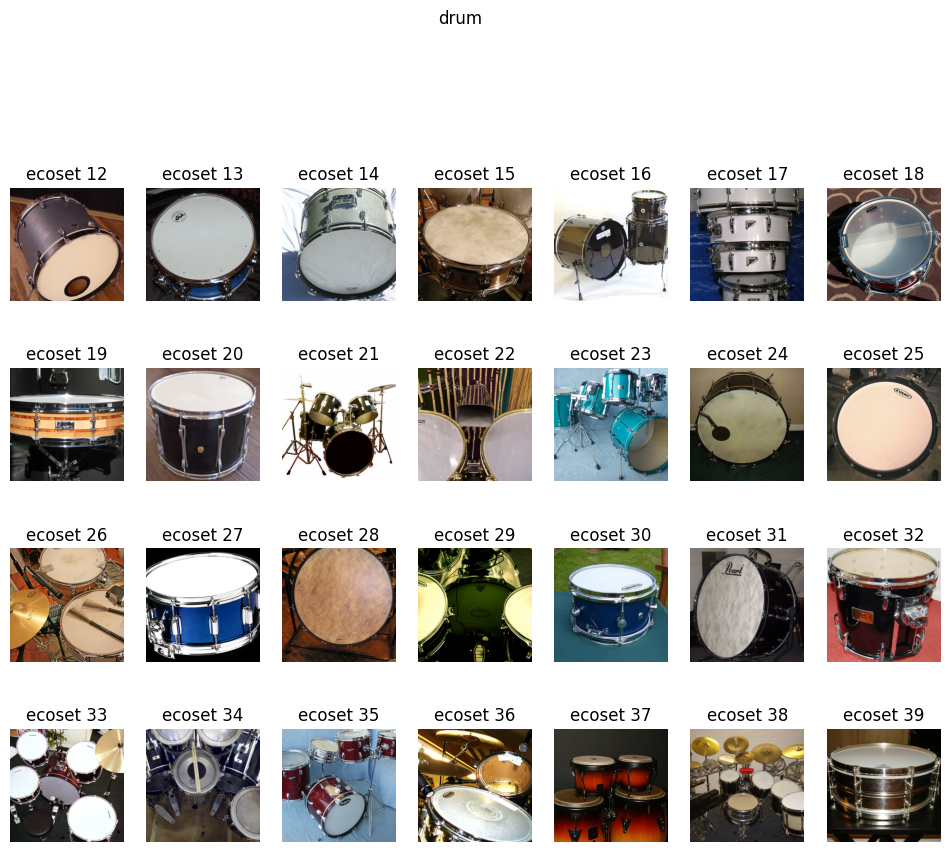

In [9]:
# for bi in np.arange(32, 40):
# for bi in np.arange(34, 35):
bi = 43;

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

plt.figure(figsize=(12, 16))

pi = 0

# for ii in np.arange(12, 61):
for ii in np.arange(12, 40):

    target_image_filename = np.array(labs['image_filename'])[ii]

    im = utilities.preprocess_image_tosave(
            utilities.load_image(target_image_filename)
        )
    # im = PIL.Image.open(target_image_filename)

    pi+=1
    plt.subplot(7, 7, pi)

    plt.imshow(im)
    plt.axis('off')

    plt.title('%s %d'%(np.array(labs['orig_set'])[ii], ii))

plt.suptitle(bname)
    

Text(0.5, 0.98, 'guitar')

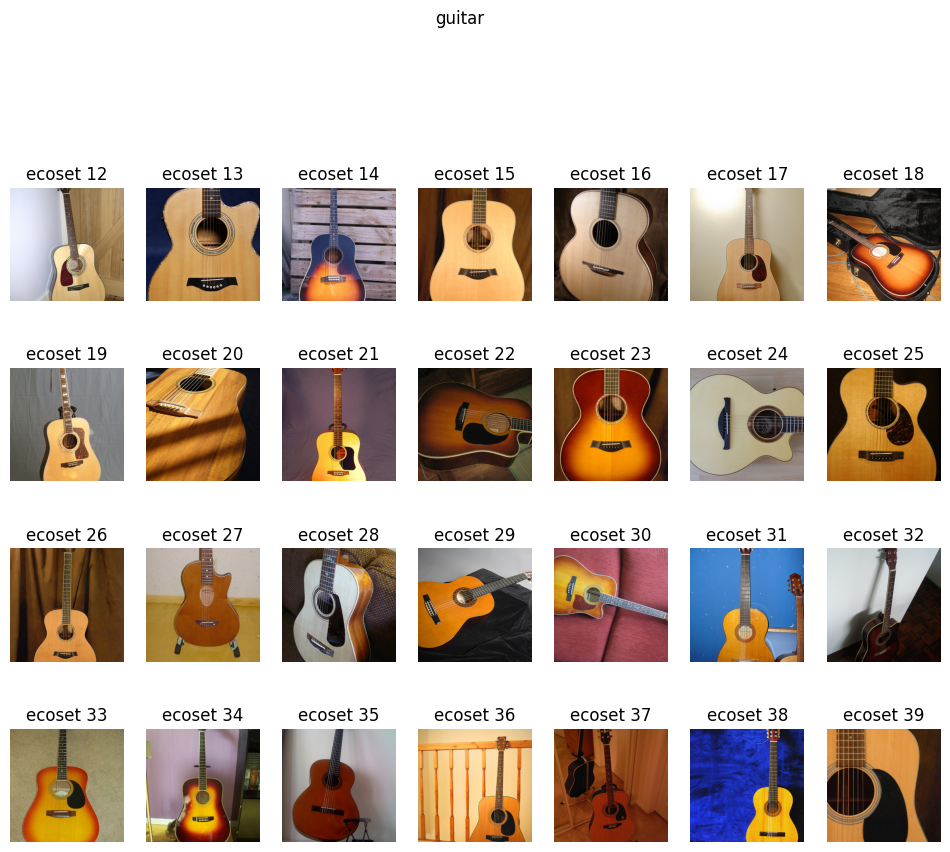

In [8]:
# for bi in np.arange(32, 40):
# for bi in np.arange(34, 35):
bi = 41

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

plt.figure(figsize=(12, 16))

pi = 0

# for ii in np.arange(12, 61):
for ii in np.arange(12, 40):

    target_image_filename = np.array(labs['image_filename'])[ii]

    im = utilities.preprocess_image_tosave(
            utilities.load_image(target_image_filename)
        )
    # im = PIL.Image.open(target_image_filename)

    pi+=1
    plt.subplot(7, 7, pi)

    plt.imshow(im)
    plt.axis('off')

    plt.title('%s %d'%(np.array(labs['orig_set'])[ii], ii))

plt.suptitle(bname)
    

train/0375_drum/n03249569_19455.JPEG


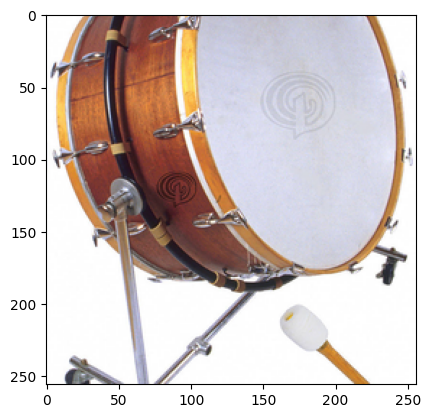

In [11]:
bi = 43

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]
ii = 24



target_image_filename = np.array(labs['image_filename'])[ii]

im = utilities.preprocess_image_tosave(
        utilities.load_image(target_image_filename)
    )

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [10]:
target_image_filename

'/lab_data/tarrlab/common/datasets/Ecoset/train/0875_broom/n02906734_21374.JPEG'

train/0875_broom/n02906734_4655.JPEG


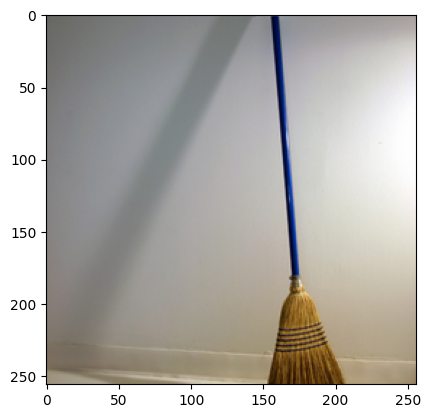

In [11]:
target_image_filename = '/lab_data/tarrlab/common/datasets/Ecoset/train/0875_broom/n02906734_4655.JPEG'


im = utilities.preprocess_image_tosave(
        utilities.load_image(target_image_filename)
    )

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [9]:
sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities, segmentation_utils

bi = 11;

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

ii = 30;

filename = np.array(labs['image_filename'])[ii]

im = PIL.Image.open(filename)

print('orig size: %d by %d'%(im.size[0], im.size[1]))

import copy
imdat = copy.deepcopy(np.array(im))

# crop to a square (if not already square)
# this always takes center of the longer side
imdat_cropped, bbox = segmentation_utils.crop_to_square(imdat)

# back to PIL format
im_cropped = PIL.Image.fromarray(imdat_cropped.astype(np.uint8))

print('size after crop: %d by %d'%(im_cropped.size[0], im_cropped.size[1]))

assert(im_cropped.size[0]==im_cropped.size[1])
# im_resized = im.resize([n_pix, n_pix], resample=PIL.Image.BILINEAR)
im_resized = im_cropped.resize([n_pix, n_pix], resample=PIL.Image.Resampling.LANCZOS)

if im_resized.mode!='RGB':
    im_resized = im_resized.convert('RGB')

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im_resized)

orig size: 500 by 343
size after crop: 343 by 343


NameError: name 'n_pix' is not defined

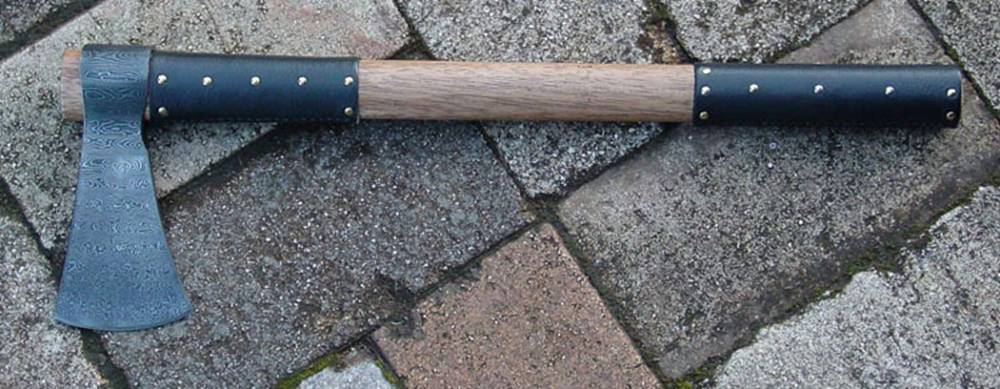

In [19]:
im

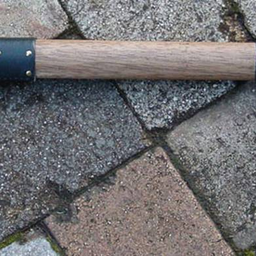

In [20]:
im_resized

In [10]:
folder_save = os.path.join(project_root, 'features','raw')

image_data_filename = os.path.join(folder_save, 'images_ecoset64_preproc.npy')

In [ ]:
ims = np.load(image_data_filename);

train/0215_axe/n02811468_687.JPEG


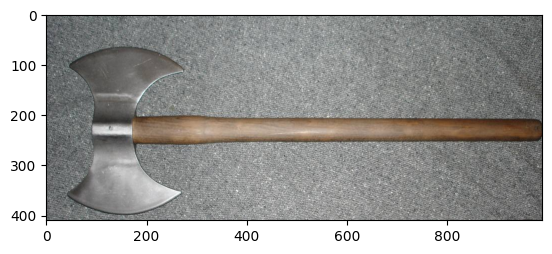

In [6]:
bi = 34;

bname = bnames[bi]

labs = labels_all.iloc[np.array(labels_all['basic_name']==bname)]

ii = 22;

# target_image_filename = '/lab_data/tarrlab/common/datasets/Ecoset/train/0174_knife/n03624400_2362.JPEG'
target_image_filename = np.array(labs['image_filename'])[ii]

im = PIL.Image.open(target_image_filename)

plt.figure()
plt.imshow(im)

print(target_image_filename.split('Ecoset/')[1])

In [5]:
target_image_filename

'/lab_data/tarrlab/common/datasets/Ecoset/train/1551_coconut/n07772935_36305.JPEG'

In [19]:
# these are a list of any images that have issues
# usually this is something like an artificial border
# or graphic that makes it look un-natural. 
ecoset_ims_exclude = ['train/1076_ant/n02220518_4413.JPEG']

In [20]:
target_image_filename.split('Ecoset/')[1]

'train/1076_ant/n02220518_4413.JPEG'

In [ ]:
ecse